In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [76]:
df = pd.read_csv('./Mall_Customers.csv')

In [77]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [78]:
df.shape

(200, 5)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [80]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [81]:
df.duplicated().sum()

0

In [82]:
df.drop(columns=['CustomerID','Gender','Age'],inplace=True)

In [83]:
df.sample(5)

,Annual Income (k$),Spending Score (1-100)
153,78,76
34,33,14
146,77,36
184,99,39
130,71,9


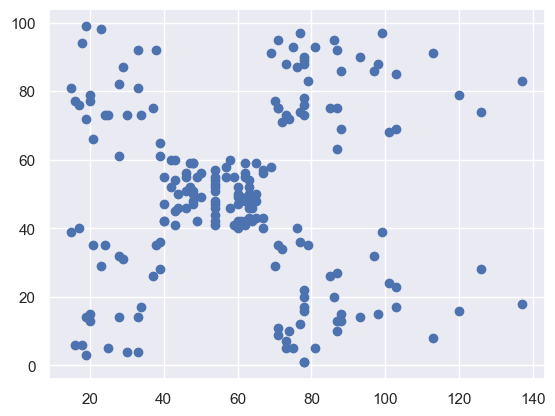

In [84]:
plt.scatter(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

In [85]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

In [86]:
wcss

[269981.28,
 183257.8615446178,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 37455.98455516028,
 31280.903845940935,
 25056.895153616188,
 21806.81299869546,
 21247.432756132755]

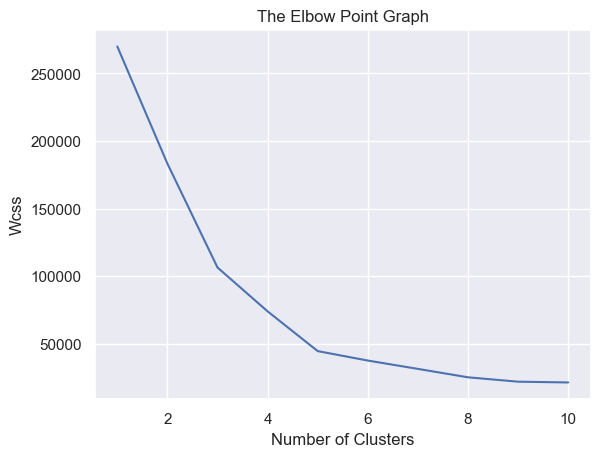

In [87]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [88]:
# optimum No. of Clusters = 5

km = KMeans(n_clusters=5)
y_pred = km.fit_predict(df)


In [89]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 3, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

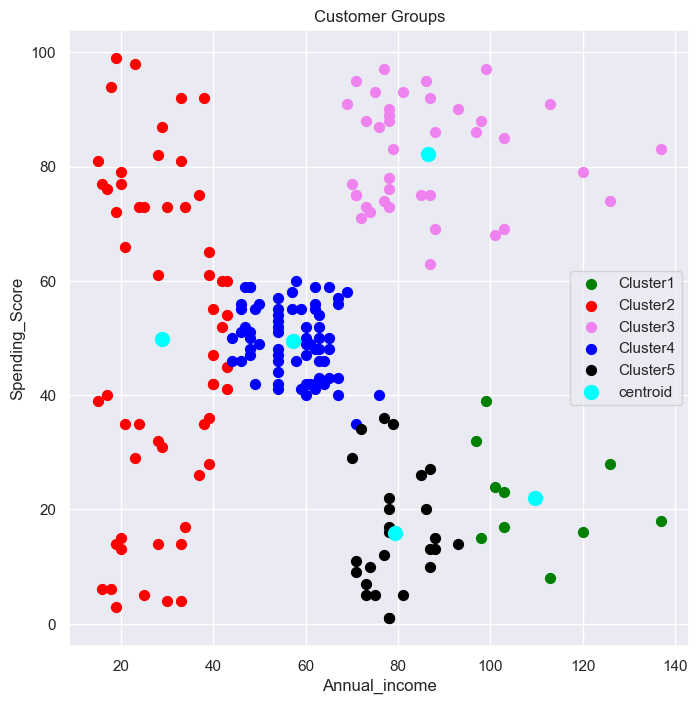

In [97]:
plt.figure(figsize=(8,8))
plt.scatter(df.iloc[y_pred==0,0],df.iloc[y_pred==0,1],s=50,c='green',label='Cluster1')
plt.scatter(df.iloc[y_pred==1,0],df.iloc[y_pred==1,1],s=50,c='red',label='Cluster2')
plt.scatter(df.iloc[y_pred==2,0],df.iloc[y_pred==2,1],s=50,c='violet',label='Cluster3')
plt.scatter(df.iloc[y_pred==3,0],df.iloc[y_pred==3,1],s=50,c='blue',label='Cluster4')
plt.scatter(df.iloc[y_pred==4,0],df.iloc[y_pred==4,1],s=50,c='black',label='Cluster5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='cyan',label='centroid')
plt.title('Customer Groups')
plt.xlabel('Annual_income')
plt.ylabel('Spending_Score')
plt.legend()
plt.show()

